In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
# Hyper-parameters
input_size = 784
num_classes = 10
num_epochs = 5
batch_size_train = 64
batch_size_test = 1000
momentum = 0.9
log_interval = 100
learning_rate=0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='data',
                    train=True,
                    transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]),
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data',
                                          train=False,
                                          transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]))


# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size_train,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size_test,
                                          shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 379184743.89it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 29595820.63it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 183299533.44it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10016050.88it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
batch = next(enumerate(train_loader))
print(batch)

(0, [tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [

Numero de batch: 0
torch.Size([1000, 1, 28, 28])
torch.Size([1000])


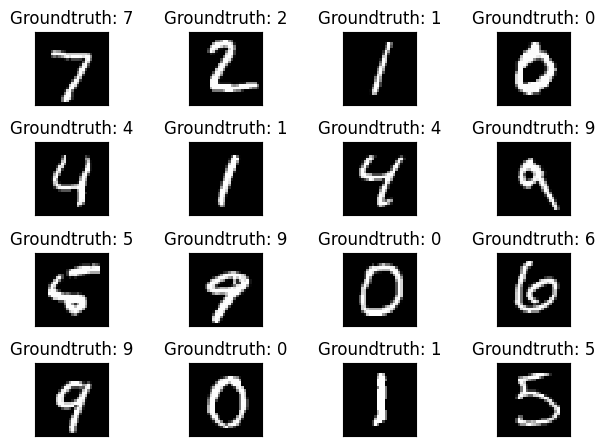

In [4]:
examples = enumerate(test_loader)

batchId, (exampleData, exampleTargets) = next(examples) #Next batch
print('Numero de batch: {}'.format(batchId))
print(exampleData.shape)
print(exampleTargets.shape)

import matplotlib.pyplot as plt

#Show the first 6 elements in the batch
plt.figure()
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.tight_layout()
  plt.imshow(exampleData[i][0], cmap='gray', interpolation='none')
  plt.title('Groundtruth: {}'.format(exampleTargets[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
#Create the neural network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
    self.fc1 = nn.Linear(5*5*64, 256)
    self.fc2 = nn.Linear(256,10)

  def forward(self, x):
    # x es 28 x 28
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2(x), 2))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 5*5*64)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x)

network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

network = network.to(device)

In [6]:
import torchsummary as ts

print(network)
ts.summary(network.to(device), (1, 28, 28), device='cuda')

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
            Conv2d-2           [-1, 32, 14, 14]           4,640
            Conv2d-3             [-1, 64, 5, 5]          18,496
            Linear-4                  [-1, 256]         409,856
            Linear-5                   [-1, 10]           2,570
Total params: 435,722
Trainable params: 435,722
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.16
Params si

<ipython-input-5-d86eca8b8f52>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [7]:
train_losses = []
train_counter = []
test_losses = []

test_counter = [i*len(train_loader.dataset) for i in range(num_epochs+1)]

#Function to train one epoch
def train(network, optimizer,  epoch):
  network.train() #Modo entrenamiento
  for batchId, (data, target) in enumerate(train_loader): #Iterate over batches
    data = data.to(device)
    target = target.to(device)

    #Feedforward pass
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()

    if batchId % log_interval == 0:
      print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batchId*len(data), len(train_loader.dataset), 100.*batchId/len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append((batchId*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(),'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')


#Testing
def test(network):
  network.eval() #Test mode
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.to(device)
      target = target.to(device)
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  length = len(test_loader.dataset)
  test_loss /= length
  test_losses.append(test_loss)
  print('\nTest set: Avg. Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), Error: {:.3f}% \n'.format(test_loss, correct, len(test_loader.dataset), 100.*correct/len(test_loader.dataset), 100.*(length-correct)/length))

In [8]:
test(network)
for epoch in range(1, num_epochs + 1):
  train(network, optimizer, epoch)
  test(network)

<ipython-input-5-d86eca8b8f52>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. Loss: 2.2999, Accuracy: 1146/10000 (11%), Error: 88.540% 

Train epoch: 1 [0/60000 (0%)]	Loss: 2.293550
Train epoch: 1 [6400/60000 (11%)]	Loss: 2.288624
Train epoch: 1 [12800/60000 (21%)]	Loss: 2.269508
Train epoch: 1 [19200/60000 (32%)]	Loss: 2.200689
Train epoch: 1 [25600/60000 (43%)]	Loss: 1.975363
Train epoch: 1 [32000/60000 (53%)]	Loss: 0.968386
Train epoch: 1 [38400/60000 (64%)]	Loss: 0.680243
Train epoch: 1 [44800/60000 (75%)]	Loss: 0.491299
Train epoch: 1 [51200/60000 (85%)]	Loss: 0.339373
Train epoch: 1 [57600/60000 (96%)]	Loss: 0.246778

Test set: Avg. Loss: 0.3074, Accuracy: 9091/10000 (91%), Error: 9.090% 

Train epoch: 2 [0/60000 (0%)]	Loss: 0.253580
Train epoch: 2 [6400/60000 (11%)]	Loss: 0.164890
Train epoch: 2 [12800/60000 (21%)]	Loss: 0.154954
Train epoch: 2 [19200/60000 (32%)]	Loss: 0.137699
Train epoch: 2 [25600/60000 (43%)]	Loss: 0.302968
Train epoch: 2 [32000/60000 (53%)]	Loss: 0.154324
Train epoch: 2 [38400/60000 (64%)]	Loss: 0.131498
Train epoch: 

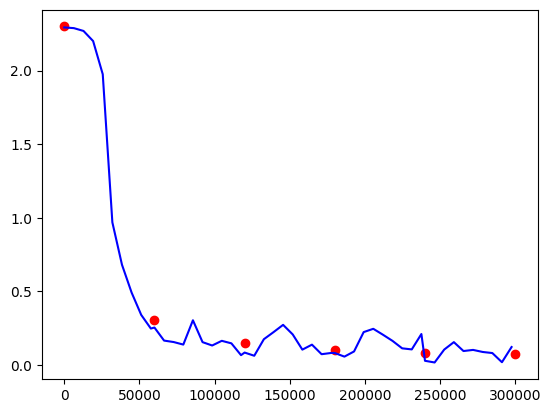

In [9]:
plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.show()

In [10]:
with torch.no_grad():
  output = network(exampleData.to(device))

<ipython-input-5-d86eca8b8f52>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


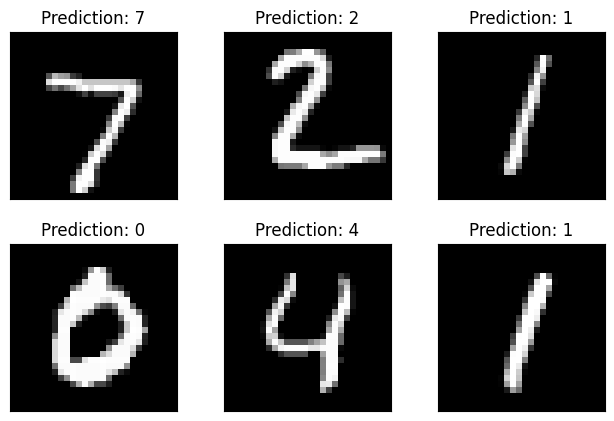

In [11]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(exampleData[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [12]:
continued_network = Net()
network_state_dict = torch.load('model.pth')
continued_network.load_state_dict(network_state_dict)
continued_network = continued_network.to(device)

continued_optimizer = optim.SGD(continued_network.parameters(), lr=0.0005, momentum=momentum)
optimizer_state_dict=torch.load('optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

In [13]:
for i in range(6, 10):
  test_counter.append(i*len(train_loader.dataset))
  train(continued_network, continued_optimizer, i)
  test(continued_network)

<ipython-input-5-d86eca8b8f52>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train epoch: 6 [0/60000 (0%)]	Loss: 0.043188
Train epoch: 6 [6400/60000 (11%)]	Loss: 0.072591
Train epoch: 6 [12800/60000 (21%)]	Loss: 0.073664
Train epoch: 6 [19200/60000 (32%)]	Loss: 0.093695
Train epoch: 6 [25600/60000 (43%)]	Loss: 0.042480
Train epoch: 6 [32000/60000 (53%)]	Loss: 0.040875
Train epoch: 6 [38400/60000 (64%)]	Loss: 0.073681
Train epoch: 6 [44800/60000 (75%)]	Loss: 0.063298
Train epoch: 6 [51200/60000 (85%)]	Loss: 0.073049
Train epoch: 6 [57600/60000 (96%)]	Loss: 0.066391

Test set: Avg. Loss: 0.0641, Accuracy: 9810/10000 (98%), Error: 1.900% 

Train epoch: 7 [0/60000 (0%)]	Loss: 0.088970
Train epoch: 7 [6400/60000 (11%)]	Loss: 0.063292
Train epoch: 7 [12800/60000 (21%)]	Loss: 0.080880
Train epoch: 7 [19200/60000 (32%)]	Loss: 0.047629
Train epoch: 7 [25600/60000 (43%)]	Loss: 0.044630
Train epoch: 7 [32000/60000 (53%)]	Loss: 0.058307
Train epoch: 7 [38400/60000 (64%)]	Loss: 0.021160
Train epoch: 7 [44800/60000 (75%)]	Loss: 0.077753
Train epoch: 7 [51200/60000 (85%)]	Los

10
10


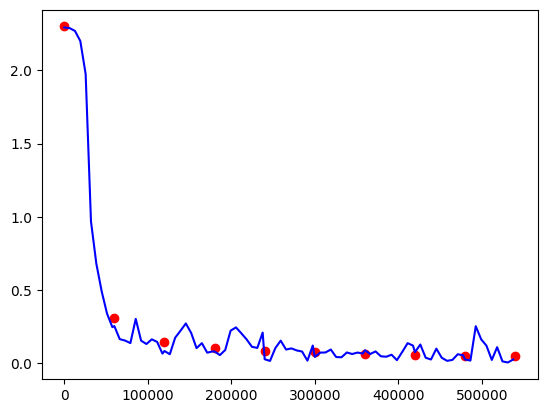

In [14]:
print(len(test_counter))
print(len(test_losses))

plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.show()

In [15]:
print(network)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [16]:
#Function to get predictions over a dataset

def get_predictions(model, iterator, device):

    #For prediction, we also deactivate training features
    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():
        for (data, target) in iterator:
            data = data.to(device)
            y_pred = model(data)

            #Remember that our network does not apply the softmax
            #We have to do it explicitly for prediction
            #y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_pred.argmax(1, keepdim = True)

            #We store the images, their labels and the pdf of each sample
            #images.append(x.cpu())
            labels.append(target.cpu())
            probs.append(y_pred.cpu())

    #images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return labels, probs

In [17]:
#Comute predictions and the label with the maximum probability
labels, probs = get_predictions(continued_network, test_loader, device)

pred_labels = torch.argmax(probs, 1)

<ipython-input-5-d86eca8b8f52>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


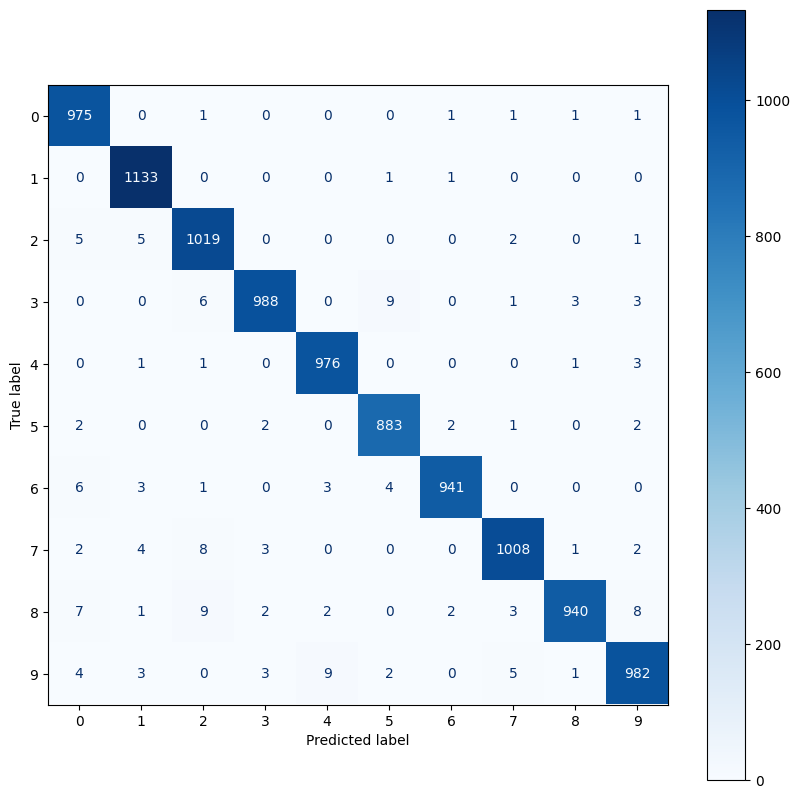

In [18]:
from sklearn import metrics

#Plot a confussion matrix
def plot_confusion_matrix(labels, pred_labels):

    fig = plt.figure(figsize = (10, 10));
    ax = fig.add_subplot(1, 1, 1);
    cm = metrics.confusion_matrix(labels, pred_labels);
    cm = metrics.ConfusionMatrixDisplay(cm);
    cm.plot(values_format = 'd', cmap = 'Blues', ax = ax)

plot_confusion_matrix(labels, pred_labels)

In [19]:
print(metrics.classification_report(labels, pred_labels, digits=6))



              precision    recall  f1-score   support

           0   0.974026  0.994898  0.984351       980
           1   0.985217  0.998238  0.991685      1135
           2   0.975120  0.987403  0.981223      1032
           3   0.989980  0.978218  0.984064      1010
           4   0.985859  0.993890  0.989858       982
           5   0.982202  0.989910  0.986041       892
           6   0.993664  0.982255  0.987927       958
           7   0.987267  0.980545  0.983895      1028
           8   0.992608  0.965092  0.978657       974
           9   0.980040  0.973241  0.976629      1009

    accuracy                       0.984500     10000
   macro avg   0.984598  0.984369  0.984433     10000
weighted avg   0.984571  0.984500  0.984485     10000

